# MEEP simulations

We will look again at a waveguide, but in the time-domain. This will introduce concepts important when doing time-domain simulations.

In [11]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video

Simple geometry as before :

In [12]:
resolution = 50 # pixels/μm
cell_size = mp.Vector3(14,14)

w = 1.0 # width of waveguide

geometry = [mp.Block(center=mp.Vector3(),
                     size=mp.Vector3(mp.inf,w,mp.inf),
                     material=mp.Medium(epsilon=12))]

w = 1.0 # width of waveguide

geometry = [mp.Block(center=mp.Vector3(),
                     size=mp.Vector3(mp.inf,w,mp.inf),
                     material=mp.Medium(epsilon=12))]

An important difference from MPB is that we would like to avoid periodic boundary conditions. To do so, we can introduce perfectly-matched layers around the simulation region :

In [13]:
pml_layers = [mp.PML(thickness=2)]

In the time-domain, we now need to define a way to excite the electromagnetic fields in the system. The most reliable way to do so is with en eigensource (see https://meep.readthedocs.io/en/latest/Python_Tutorials/Eigenmode_Source/).

In [17]:
fsrc = 0.15 # frequency of eigenmode or constant-amplitude source
kx = 0.4    # initial guess for wavevector in x-direction of eigenmode
bnum = 1    # band number of eigenmode

kpoint = mp.Vector3(kx)

sources = [mp.EigenModeSource(src=mp.GaussianSource(fsrc,fwidth=0.2*fsrc),
                              center=mp.Vector3(),
                              size=mp.Vector3(y=3*w),
                              direction=mp.NO_DIRECTION,
                              eig_kpoint=kpoint,
                              eig_band=bnum,
                              eig_parity=mp.EVEN_Y+mp.ODD_Z,
                              eig_match_freq=True)]

Defining the simulation object is similar to ModeSolver :

In [ ]:
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    geometry=geometry,
                    symmetries=[mp.Mirror(mp.Y)])

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000775099 s
Working in 2D dimensions.
Computational cell is 14 x 14 x 0 with resolution 50
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.380896 s
-----------
MPB solved for omega_1(0.4,0,0) = 0.14249 after 9 iters
MPB solved for omega_1(0.426652,0,0) = 0.149974 after 7 iters
MPB solved for omega_1(0.426745,0,0) = 0.15 after 4 iters
MPB solved for omega_1(0.426745,0,0) = 0.15 after 1 iters


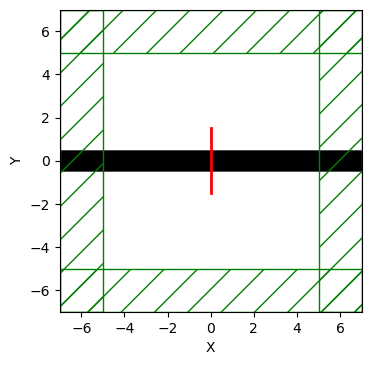

In [18]:
f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

Meep progress: 26.400000000000002/100.0 = 26.4% done in 4.0s, 11.2s to go
on time step 2640 (time=26.4), 0.00151524 s/step
Meep progress: 53.03/100.0 = 53.0% done in 8.0s, 7.1s to go
on time step 5303 (time=53.03), 0.00150235 s/step
Meep progress: 79.71000000000001/100.0 = 79.7% done in 12.0s, 3.1s to go
on time step 7971 (time=79.71), 0.00149946 s/step
run 0 finished at t = 100.0 (10000 timesteps)


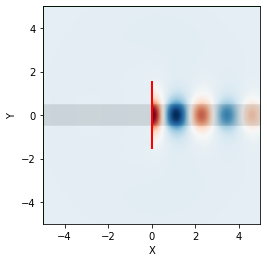

In [19]:
sim.run(until=100)
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(10,10)),
           fields=mp.Ez,
           field_parameters={'alpha':0.9})
plt.show()

In [20]:
f = plt.figure(dpi=100)
animate = mp.Animate2D(sim,mp.Ez,f=f,normalize=True)
sim.run(mp.at_every(1,animate),until_after_sources=50)
plt.close()

on time step 10000 (time=100), 0.0522457 s/step
Meep progress: 12.019999999999996/383.3333435058594 = 3.1% done in 4.0s, 123.6s to go
on time step 12200 (time=122), 0.00181969 s/step
Meep progress: 34.0/383.3333435058594 = 8.9% done in 8.0s, 82.5s to go
on time step 14398 (time=143.98), 0.00182029 s/step
Meep progress: 55.75/383.3333435058594 = 14.5% done in 12.0s, 70.7s to go
on time step 16550 (time=165.5), 0.00185921 s/step
Meep progress: 77.5/383.3333435058594 = 20.2% done in 16.0s, 63.3s to go
on time step 18727 (time=187.27), 0.00183807 s/step
Meep progress: 99.25999999999999/383.3333435058594 = 25.9% done in 20.0s, 57.3s to go
on time step 20903 (time=209.03), 0.00183887 s/step
Meep progress: 121.00999999999999/383.3333435058594 = 31.6% done in 24.0s, 52.1s to go
on time step 23091 (time=230.91), 0.0018288 s/step
Meep progress: 142.88/383.3333435058594 = 37.3% done in 28.0s, 47.2s to go
on time step 25270 (time=252.7), 0.00183615 s/step
Meep progress: 164.62/383.3333435058594 = 

In [21]:
filename = 'media/oblique-source-normal.mp4'
animate.to_mp4(10,filename)
Video(filename)

Generating MP4...
